In [61]:
import xarray as xr
import netCDF4 as nc
import numpy as np
from scipy.io import netcdf
import xesmf as xe
import sys
sys.path.insert(0,'../')
import environment
import os
import glob

In [78]:
data_source = 'http://www.earthbyte.org/webdav/ftp/Data_Collections/Scotese_Wright_2018_PaleoDEM/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip'
data_dest = os.path.join(os.environ.get('ISCA_REPO_DIR'),'experiments/input/land_masks')
cmd = f'cd {data_dest}; wget {data_source}; '
cmd += f'unzip {os.path.join(data_dest,"Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip")}'
os.system(cmd)

--2021-09-13 16:55:01--  http://www.earthbyte.org/webdav/ftp/Data_Collections/Scotese_Wright_2018_PaleoDEM/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip
Resolving www.earthbyte.org (www.earthbyte.org)... 104.128.67.157
Connecting to www.earthbyte.org (www.earthbyte.org)|104.128.67.157|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.earthbyte.org/webdav/ftp/Data_Collections/Scotese_Wright_2018_PaleoDEM/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip [following]
--2021-09-13 16:55:02--  https://www.earthbyte.org/webdav/ftp/Data_Collections/Scotese_Wright_2018_PaleoDEM/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip
Connecting to www.earthbyte.org (www.earthbyte.org)|104.128.67.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9302291 (8.9M) [application/zip]
Saving to: ‘Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip.1’

     0K .......... .......... .......... ........

Archive:  /home/ec2-user/environment/isca_aws/experiments/input/land_masks/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip
   creating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/
  inflating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/All_Maps.gpml  
  inflating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map01_PALEOMAP_1deg_Holocene_0Ma.nc  
  inflating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map01_PALEOMAP_1deg_Holocene_0Ma.nc.band1.level0.gplates.cache  
  inflating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map01_PALEOMAP_1deg_Holocene_0Ma.nc.band1.mipmaps.gplates.cache  
  inflating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map03_PALEOMAP_1deg_Pliocene_5Ma.nc  
  inflating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map03_PALEOMAP_1deg_Pliocene_5Ma.nc.band1.level0.gplates.cache  
  inflating: Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map03_PALEOMAP_1deg_Pliocen

replace License.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


256

In [74]:
def regrid_continent_maps(remap_file):

    base_file = os.path.join(os.environ.get('GFDL_BASE'),'input/land_masks/era_land_t42.nc')
    base = xr.open_mfdataset(base_file)

    ds_out = xr.Dataset({'lat': (['lat'], base['lat'].values),
                         'lon': (['lon'], base['lon'].values)})


    out_file = f'continents_{remap_file.split("_")[-1]}'

    out_dir = os.path.join(os.environ.get('ISCA_REPO_DIR'),'experiments/input/land_masks')
    out_file = os.path.join(out_dir,out_file)
 
    land = xr.open_mfdataset(remap_file)
    regridder = xe.Regridder(land, ds_out, 'bilinear')
    ds_out = regridder(land)
    ds_out['land_mask'] = (ds_out.dims,np.array(ds_out['z'].values > 0.0,dtype=float))
    ds_out = ds_out.rename({'z':'zsurf'})
    os.system(f'rm -f {out_file}')
    ds_out.to_netcdf(out_file)

In [79]:
files = glob.glob(f'{data_dest}/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map*.nc')

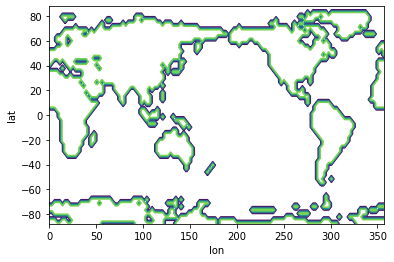

In [81]:
tmp = xr.open_mfdataset(f'{data_dest}/continents_0Ma.nc')
tmp['land_mask'].plot.contour()

In [75]:
for f in files:
    regrid_continent_maps(f)

/data/team/conda/envs/isca_post/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/data/team/conda/envs/isca_post/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/data/team/conda/envs/isca_post/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/data/team/conda/envs/isca_post/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future 